# Importing and Installing the Dependencies

In [6]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [7]:
import cv2
import numpy as np
import os # to deal with the filepaths
from matplotlib import pyplot as plt # pyplot to visualize images
import time #To give sleep between each frame
import mediapipe as mp #To get the gestures

# Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right han

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [158]:


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [12]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [14]:
len(results.face_landmarks.landmark)

468

In [28]:
results

mediapipe.python.solution_base.SolutionOutputs

In [29]:
draw_landmarks(frame, results)

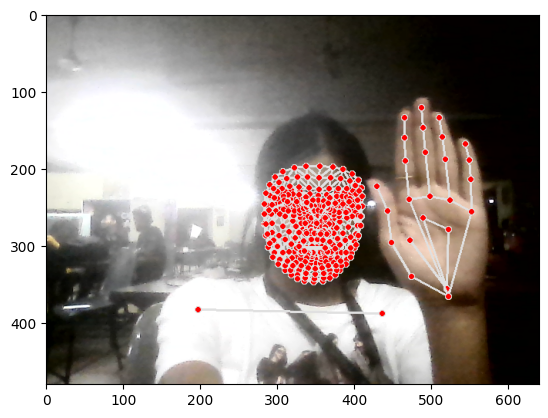

In [30]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extracting Keypoint Values

In [31]:
len(results.left_hand_landmarks.landmark)

21

In [33]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [34]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [156]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [36]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [37]:
result_test = extract_keypoints(results)

In [38]:
result_test

array([ 0.54993594,  0.56612772, -0.57641721, ...,  0.        ,
        0.        ,  0.        ])

In [39]:
468*3+33*4+21*3+21*3

1662

In [40]:
np.save('0', result_test)

In [41]:
np.load('0.npy')

array([ 0.54993594,  0.56612772, -0.57641721, ...,  0.        ,
        0.        ,  0.        ])

# Setting up Folders for Collection

In [157]:
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30
start_folder = 30

In [ ]:
# hello
## 0 -> for storing data frames
## 1
## 2
## ...
## 29
# thanks

# I love you

In [43]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collecting Keypoint Values for Training and Testing

In [55]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actionsq
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                continue    #error resolved --> added continue

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [56]:
cap.release()
cv2.destroyAllWindows()

# Preprocessing Data and Create Labels and Features

In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [58]:
!pip install scikit-learn

In [59]:
label_map = {label:num for num, label in enumerate(actions)}

In [60]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
np.array(sequences).shape

(90, 30, 1662)

In [63]:
np.array(labels).shape

(90,)

In [64]:
X = np.array(sequences)

In [65]:
X.shape

(90, 30, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [69]:
y_test.shape

(5, 3)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [108]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation ='relu',input_shape =(30,1662)))
model.add(LSTM(128,return_sequences=True,activation ='relu'))
model.add(LSTM(64,return_sequences=False,activation ='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [109]:
X.shape

(90, 30, 1662)

In [110]:
res = [.7,0.2,0.1]

In [111]:
actions[np.argmax(res)]

'hello'

In [112]:
actions[np.argmax(res)]

'hello'

In [113]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [78]:
model.fit(X_train,y_train,epochs=2000, callbacks =[tb_callback])

Epoch 1/2000
3/3 [==============================] - 9s 80ms/step - loss: 1.0987 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0986 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0986 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0985 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0984 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0985 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0984 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0983 - categorical_accuracy: 0.3529
E

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [115]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [116]:
actions[np.argmax(res[3])]

'hello'

In [96]:
actions[np.argmax(y_test[3])]

'hello'

# Saving Weights

In [117]:

model.save('action.h5')


In [104]:
del model

In [118]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [119]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [120]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 103ms/step


In [121]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [122]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 2],
        [0, 3]],

       [[3, 0],
        [2, 0]]], dtype=int64)

In [123]:
accuracy_score(ytrue, yhat)

0.6

# Test in Real Time

In [150]:
import cv2
import numpy as np

# Initialize a sample colors list with three BGR color tuples
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]

# Initialize a capture object to access the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

def prob_viz(res, action, frame, color):
    output_frame = frame.copy()
    top_left = (0, 60)
    bottom_right = (int(res * 100), 90)
    cv2.rectangle(output_frame, top_left, bottom_right, color, -1)
    cv2.putText(output_frame, action, (0, 85), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

actions = ['hello', 'thanks', 'iloveyou']

while True:
    ret, frame = cap.read()  # Read a frame from the webcam
    
    if not ret:
        break  # If reading the frame fails, exit the loop
    
    # Perform any additional image processing on the frame if needed
    
    for idx, action in enumerate(actions):
        res = 0.5  # Replace with your actual probability data for each action
        resulting_frame = prob_viz(res, action, frame, colors[idx])
        
        # Display the resulting frame for the current action
        window_name = f"Result for {action}"
        cv2.imshow(window_name, resulting_frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


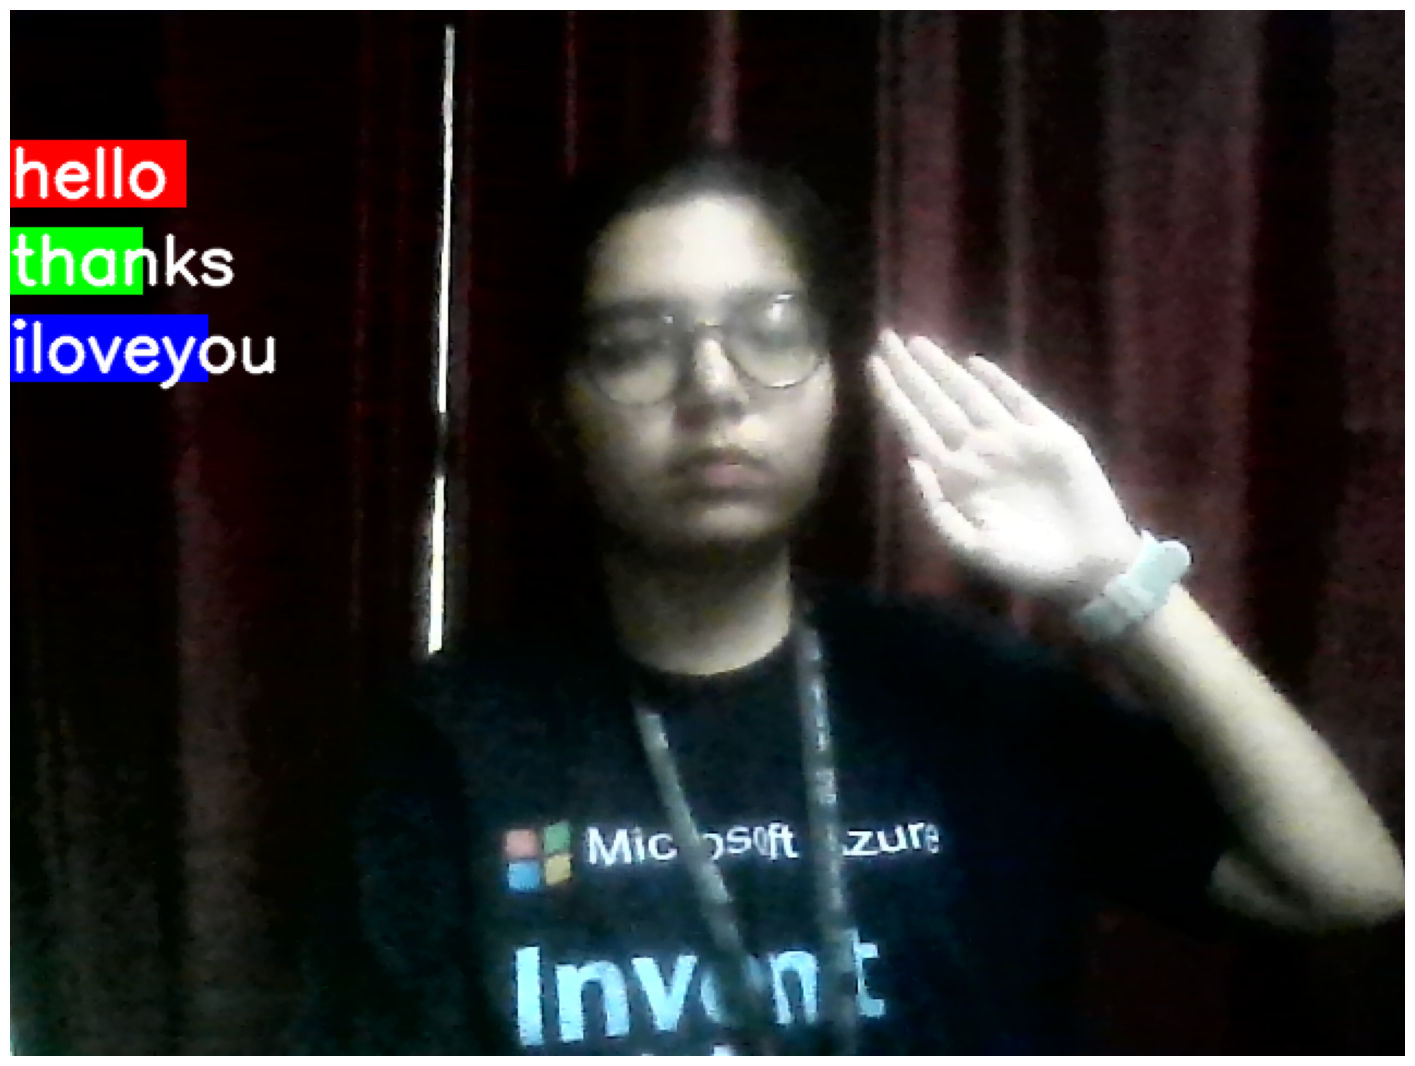

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize a sample colors list with three BGR color tuples
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]

# Initialize a capture object to access the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

actions = ['hello', 'thanks', 'iloveyou']

while True:
    ret, frame = cap.read()  # Read a frame from the webcam
    
    if not ret:
        break  # If reading the frame fails, exit the loop
    
    # Perform any additional image processing on the frame if needed
    
    res = [0.8, 0.6, 0.9]  # Replace with your actual probability data for each action
    
    resulting_frame = prob_viz(res, actions, frame, colors)
    
    # Display the resulting frame
    cv2.imshow("Result", resulting_frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Display the resulting frame using matplotlib
plt.figure(figsize=(18, 18))
plt.imshow(cv2.cvtColor(resulting_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
